# Enhancing Real-Time Audio Communication Through Advanced Noise and Reverberation Processing


In an era dominated by remote work and digital interactions, clear and effective communication has never been more critical. However, the prevalence of noisy environments and reverberant spaces often compromises the quality of audio in online meetings and live broadcasts, leading to decreased intelligibility and listener fatigue. This project aims to tackle these challenges head-on by developing an adaptive audio processing system designed to significantly improve speech quality and intelligibility in real-time communications.

## Project Objective


The core goal of this project is to enhance the clarity and quality of audio in digital communications, facilitating more effective and enjoyable interactions in various acoustically challenging environments. By leveraging advanced noise suppression, echo cancellation, and reverberation control techniques, we aspire to deliver a superior listening experience that mirrors the clarity of face-to-face conversation.

## Relevance to Current Communication Trends

As the world continues to embrace online platforms for both professional and personal communication, the demand for technologies that can ensure clear and uninterrupted audio is on the rise. This project directly addresses this need by focusing on improving audio quality in real-time communication scenarios, ranging from large conference rooms with echoing acoustics to bustling street scenes that infiltrate home offices. In doing so, we not only aim to enhance the user experience but also to contribute to the broader goal of making digital communications more accessible and effective.

## Addressing the Challenge


To achieve our objective, we will explore and adapt existing audio processing techniques, train and test models with real-world data, and benchmark our solutions against current standards. Our approach is grounded in the practical application of theories and concepts covered in the COMP47700-Speech and Audio module, including the Two Tube Model, the Acoustic Theory of Speech Production, and real-time speech transmission dynamics.

By aligning our project with these foundational theories, we commit to not only advancing the technical aspects of audio processing but also deepening our understanding of speech production and perception. This holistic approach ensures that our solutions are both innovative and informed by the complex nature of human auditory communication.

In [ ]:
pip install -r MS-SNSD-master/requirements.txt

In [4]:
import os
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def normalize_audio(audio):
    """
    Normalize an audio signal to the range [-1, 1].
    """
    max_value = np.max(np.abs(audio))
    if max_value > 0:
        audio = audio / max_value
    return audio

def spectral_subtraction(audio, sr):
    """
    Perform spectral subtraction method for noise reduction.
    """
    n_fft = 2048
    hop_length = 512
    # Estimate the noise by averaging the first few frames assuming they are noise
    S_full, phase = librosa.magphase(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))
    S_filter = np.mean(S_full[:, :10], axis=1, keepdims=True)
    S_clean = np.maximum(S_full - S_filter, 0)
    y_clean = librosa.istft(S_clean * phase, hop_length=hop_length)
    return y_clean

def detect_silence_and_trim(audio, sr):
    """
    Detect and remove silence from an audio signal.
    """
    # Using a threshold to detect silence
    trim_audio, index = librosa.effects.trim(audio, top_db=20)
    return trim_audio

def pre_emphasis_filter(audio, pre_emphasis=0.97):
    """
    Apply a pre-emphasis filter to the audio signal.
    """
    return np.append(audio[0], audio[1:] - pre_emphasis * audio[:-1])

def process_audio_file(filepath, sr=None):
    """
    Process an individual audio file.
    """
    audio, sr = librosa.load(filepath, sr=sr)
    # Noise reduction
    audio_nr = spectral_subtraction(audio, sr)
    # Silence removal
    audio_silence_removed = detect_silence_and_trim(audio_nr, sr)
    # Normalization
    audio_normalized = normalize_audio(audio_silence_removed)
    # Pre-emphasis
    audio_preemphasized = pre_emphasis_filter(audio_normalized)
    return audio_preemphasized, sr

def process_directory(root_directory, noise_type, db_level):
    """
    Process a directory of audio files with noise reduction, silence removal, normalization, and pre-emphasis.
    """
    # Directory paths
    wav_directory = os.path.join(root_directory, f"{noise_type}_{db_level}dB", "wav")
    output_directory = os.path.join(root_directory, f"processed_{noise_type}_{db_level}dB")
    os.makedirs(output_directory, exist_ok=True)
    
    # Process each audio file in the directory
    for filename in os.listdir(wav_directory):
        if filename.endswith('.wav'):
            filepath = os.path.join(wav_directory, filename)
            audio_processed, sr = process_audio_file(filepath)
            output_path = os.path.join(output_directory, filename)
            sf.write(output_path, audio_processed, sr)

# Example usage commented out
# process_directory('NOIZEUS', 'airport', '0')
            
# (Only if you want to visualize, otherwise remove this part)
def plot_waveforms(original_audio, processed_audio, sr):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(original_audio, sr=sr, alpha=0.5)
    plt.title('Original Audio')
    plt.ylim([-1, 1])
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(processed_audio, sr=sr, alpha=0.5)
    plt.title('Processed Audio')
    plt.ylim([-1, 1])
    plt.show()


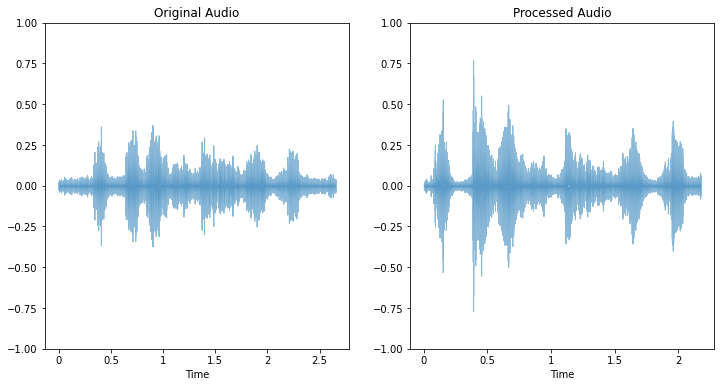

In [12]:
from IPython.display import Audio

# Define the root directory for the NOIZEUS dataset
root_directory = 'NOIZEUS'
noise_types = ['airport', 'babble', 'car', 'exhibition', 'restaurant', 'station', 'street', 'train']
db_levels = ['0', '5', '10']

# Process directories first
for noise_type in noise_types:
    for db_level in db_levels:
        process_directory(root_directory, noise_type, db_level)

# Original audio directory
original_directory = os.path.join(root_directory, f"{noise_types[0]}_{db_levels[0]}dB", "wav")

# Path to the processed audio files
processed_directory = os.path.join(root_directory, f"processed_{noise_types[0]}_{db_levels[0]}dB")

# Load an example processed file
example_filenames = os.listdir(processed_directory)
if example_filenames:
    example_filename = example_filenames[0]
    original_path = os.path.join(original_directory, example_filename)
    processed_path = os.path.join(processed_directory, example_filename)
    
    # Load audio files
    original_audio, sr = librosa.load(original_path, sr=None)
    processed_audio, sr = librosa.load(processed_path, sr=None)

    # Plot the waveform of the original and processed audio
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(original_audio, sr=sr, alpha=0.5)
    plt.title('Original Audio')
    plt.ylim([-1, 1])
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(processed_audio, sr=sr, alpha=0.5)
    plt.title('Processed Audio')
    plt.ylim([-1, 1])
    plt.show()
    
    # Play the original audio
    display(Audio(data=original_audio, rate=sr))
    # Play the processed (normalized) audio
    display(Audio(data=processed_audio, rate=sr))